## Reducing computational time and memory
last update: 9/30 (2017)

In [1]:
import DSP
using PyPlot

In [2]:
include("../juwvid.jl")

juwvid

## STFT

In [3]:
## sin FM 
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);

In [4]:
tfrst=stft.tfrstft(y);

Use fft.


### Thinning time grids using 1 grid in 10 grids.

In [5]:
nthin=10
itc=collect(1:nthin:nsample);

In [6]:
tfrsti=stft.tfrstft(y,NaN,NaN,NaN,itc);

Use fft.


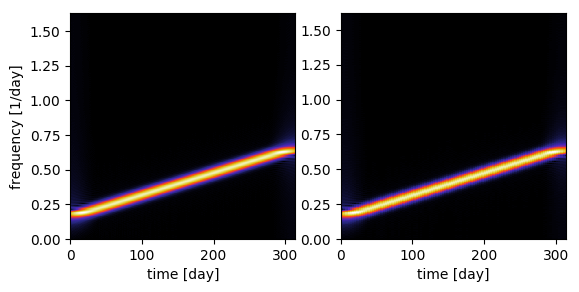

PyObject <matplotlib.text.Text object at 0x7f91cc9ff9b0>

In [7]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.wtfrshow(abs.(tfrst),x[2]-x[1],x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.wtfrshow(abs.(tfrsti),(x[2]-x[1])*nthin,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time [day]")

## WV

In [8]:
## sin FM 
nsample=1024
x,y,iw,ynorm=sampledata.genlinfm(nsample,1.0,0.01);
z=DSP.Util.hilbert(y);

In [9]:
tfrfc=cohenclass.tfrwv(z,NaN,NaN,NaN,NaN,0);

Single Wigner Ville
Use fft.


### Thinning time grids using 1 grid in 10 grids.

In [10]:
nthin=10
itc=collect(1:nthin:nsample);

In [11]:
tfrfi=cohenclass.tfrwv(z,NaN,NaN,NaN,itc,0);

Single Wigner Ville
Use fft.


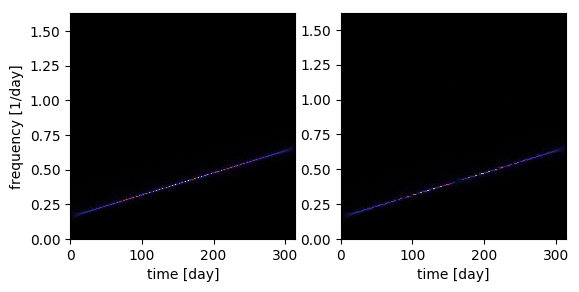

PyObject <matplotlib.text.Text object at 0x7f91cc6b8dd8>

In [13]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs.(tfrfc),x[2]-x[1],x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs.(tfrfi),(x[2]-x[1])*nthin,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time [day]")

### pseudo WV

In [14]:
## sin FM 
nsample=4096;
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/100.0,30.0,365.0);
z=DSP.Util.hilbert(ys);

In [15]:
tfrpfc=cohenclass.tfrpwv(z);

Single pseudo Wigner Ville
Use fft.


In [16]:
### using 1 grid in 10 grids  
nthin=20
itc=collect(1:nthin:nsample);
tfrpfi=cohenclass.tfrpwv(z,NaN,NaN,NaN,itc,NaN,0);

Single pseudo Wigner Ville
Use fft.


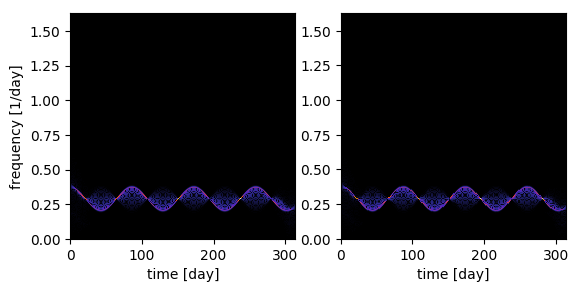

PyObject <matplotlib.text.Text object at 0x7f91c45bb390>

In [17]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs.(tfrpfc),x[2]-x[1],x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs.(tfrpfi),(x[2]-x[1])*nthin,x[1],x[end],NaN,NaN,1.0)
PyPlot.xlabel("time [day]")

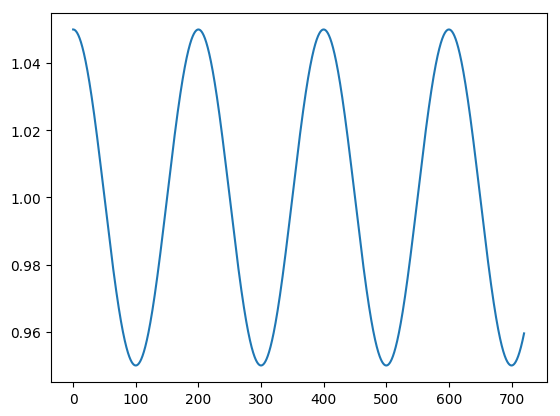

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f91b84567f0>

In [18]:
## sin FM 
nsample=4096;
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/200.0,10.0,720.0);
z=DSP.Util.hilbert(ys);
PyPlot.plot(xs,iws/(2*pi))

In [37]:
nnufft=100
fs,fe=juwutils.frequency_to_index([0.95,1.05], xs[2]-xs[1], nsample,nnufft)

2-element Array{Float64,1}:
 1368.33
 1512.37

In [38]:
fin=collect(linspace(fs,fe,nnufft))
tfrpfc=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0,"nufft");

Single pseudo Wigner Ville
Use nufft.


In [40]:
itc=collect(1:nthin:nsample);
tfrpfi=cohenclass.tfrpwv(z,NaN,NaN,fin,itc,NaN,0,"nufft");

Single pseudo Wigner Ville
Use nufft.


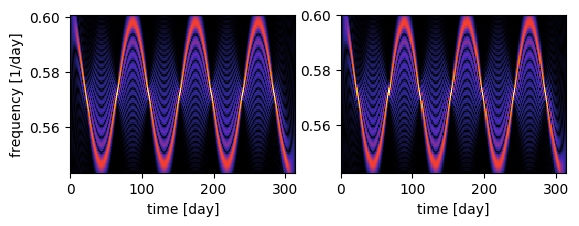

PyObject <matplotlib.text.Text object at 0x7f91cc1bb0b8>

In [41]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs.(tfrpfc),x[2]-x[1],x[1],x[end],fin[1],fin[end],0.7)
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs.(tfrpfi),(x[2]-x[1])*nthin,x[1],x[end],fin[1],fin[end],0.7)
PyPlot.xlabel("time [day]")